In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib as mtl
import numpy as np
import scipy

import consts
import input_output
import signal_processing
import image_processing
import plotting


In [18]:
def compare(l:list, comparing_categories:list):
    p_values = []
    infos = []
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            p = scipy.stats.mannwhitneyu(l[i], l[j])[1]
            p_values.append(p)
            infos.append(f'Comparing {comparing_categories[i]} to {comparing_categories[j]}')
    adjusted_pvalues = scipy.stats.false_discovery_control(p_values)
    for info, ap in zip(infos, adjusted_pvalues):
        if ap < 0.05:

            print(info)
            print(ap)


In [19]:

astro_responsivness = None
astro_intensity = None

for info in input_output.mouse_infos(currents = 'all'):
    neurons_activity, astrocytes_activity = signal_processing.get_activity(info)
    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(info)
    
    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    astrocytes_peaks[astrocytes_peaks < 2] = np.nan
    neurons_peaks[neurons_activity == 0] = np.nan
    neurons_peaks[neurons_peaks < 2] = np.nan

    astrocytes_activity_sum = np.sum(astrocytes_activity, axis = 0).flatten()
    astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
    neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()
    neurons_activity_sum = np.sum(neurons_activity, axis = 0).flatten()


    new_astropoints = np.vstack((neurons_peaks_avg, astrocytes_activity_sum))
    if astro_responsivness is None:
        astro_responsivness = new_astropoints
    else:
        astro_responsivness = np.hstack((astro_responsivness, new_astropoints))
    astro_responsivness = astro_responsivness[:, ~np.isnan(astro_responsivness[0])]

    new_astropoints = np.vstack((neurons_peaks_avg, astrocytes_peaks_avg))
    if astro_intensity is None:
        astro_intensity = new_astropoints
    else:
        astro_intensity = np.hstack((astro_intensity, new_astropoints))
    astro_intensity = astro_intensity[:, ~np.isnan(astro_intensity[0])]


/tmp/ipykernel_144177/3133580008.py:14: RuntimeWarning: Mean of empty slice
  astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
/tmp/ipykernel_144177/3133580008.py:15: RuntimeWarning: Mean of empty slice
  neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()


## B

In [20]:
scipy.stats.mannwhitneyu(astro_responsivness[0, astro_responsivness[1]==0], 
                         astro_responsivness[0, astro_responsivness[1]>0])

MannwhitneyuResult(statistic=53157862.0, pvalue=0.0)

15.472 ± 12.608 (N = 25765)
25.884 ± 18.101 (N = 7598)


Text(0.5, 0.98, 'Effect of neuronal response\nintensity on astro responsivness')

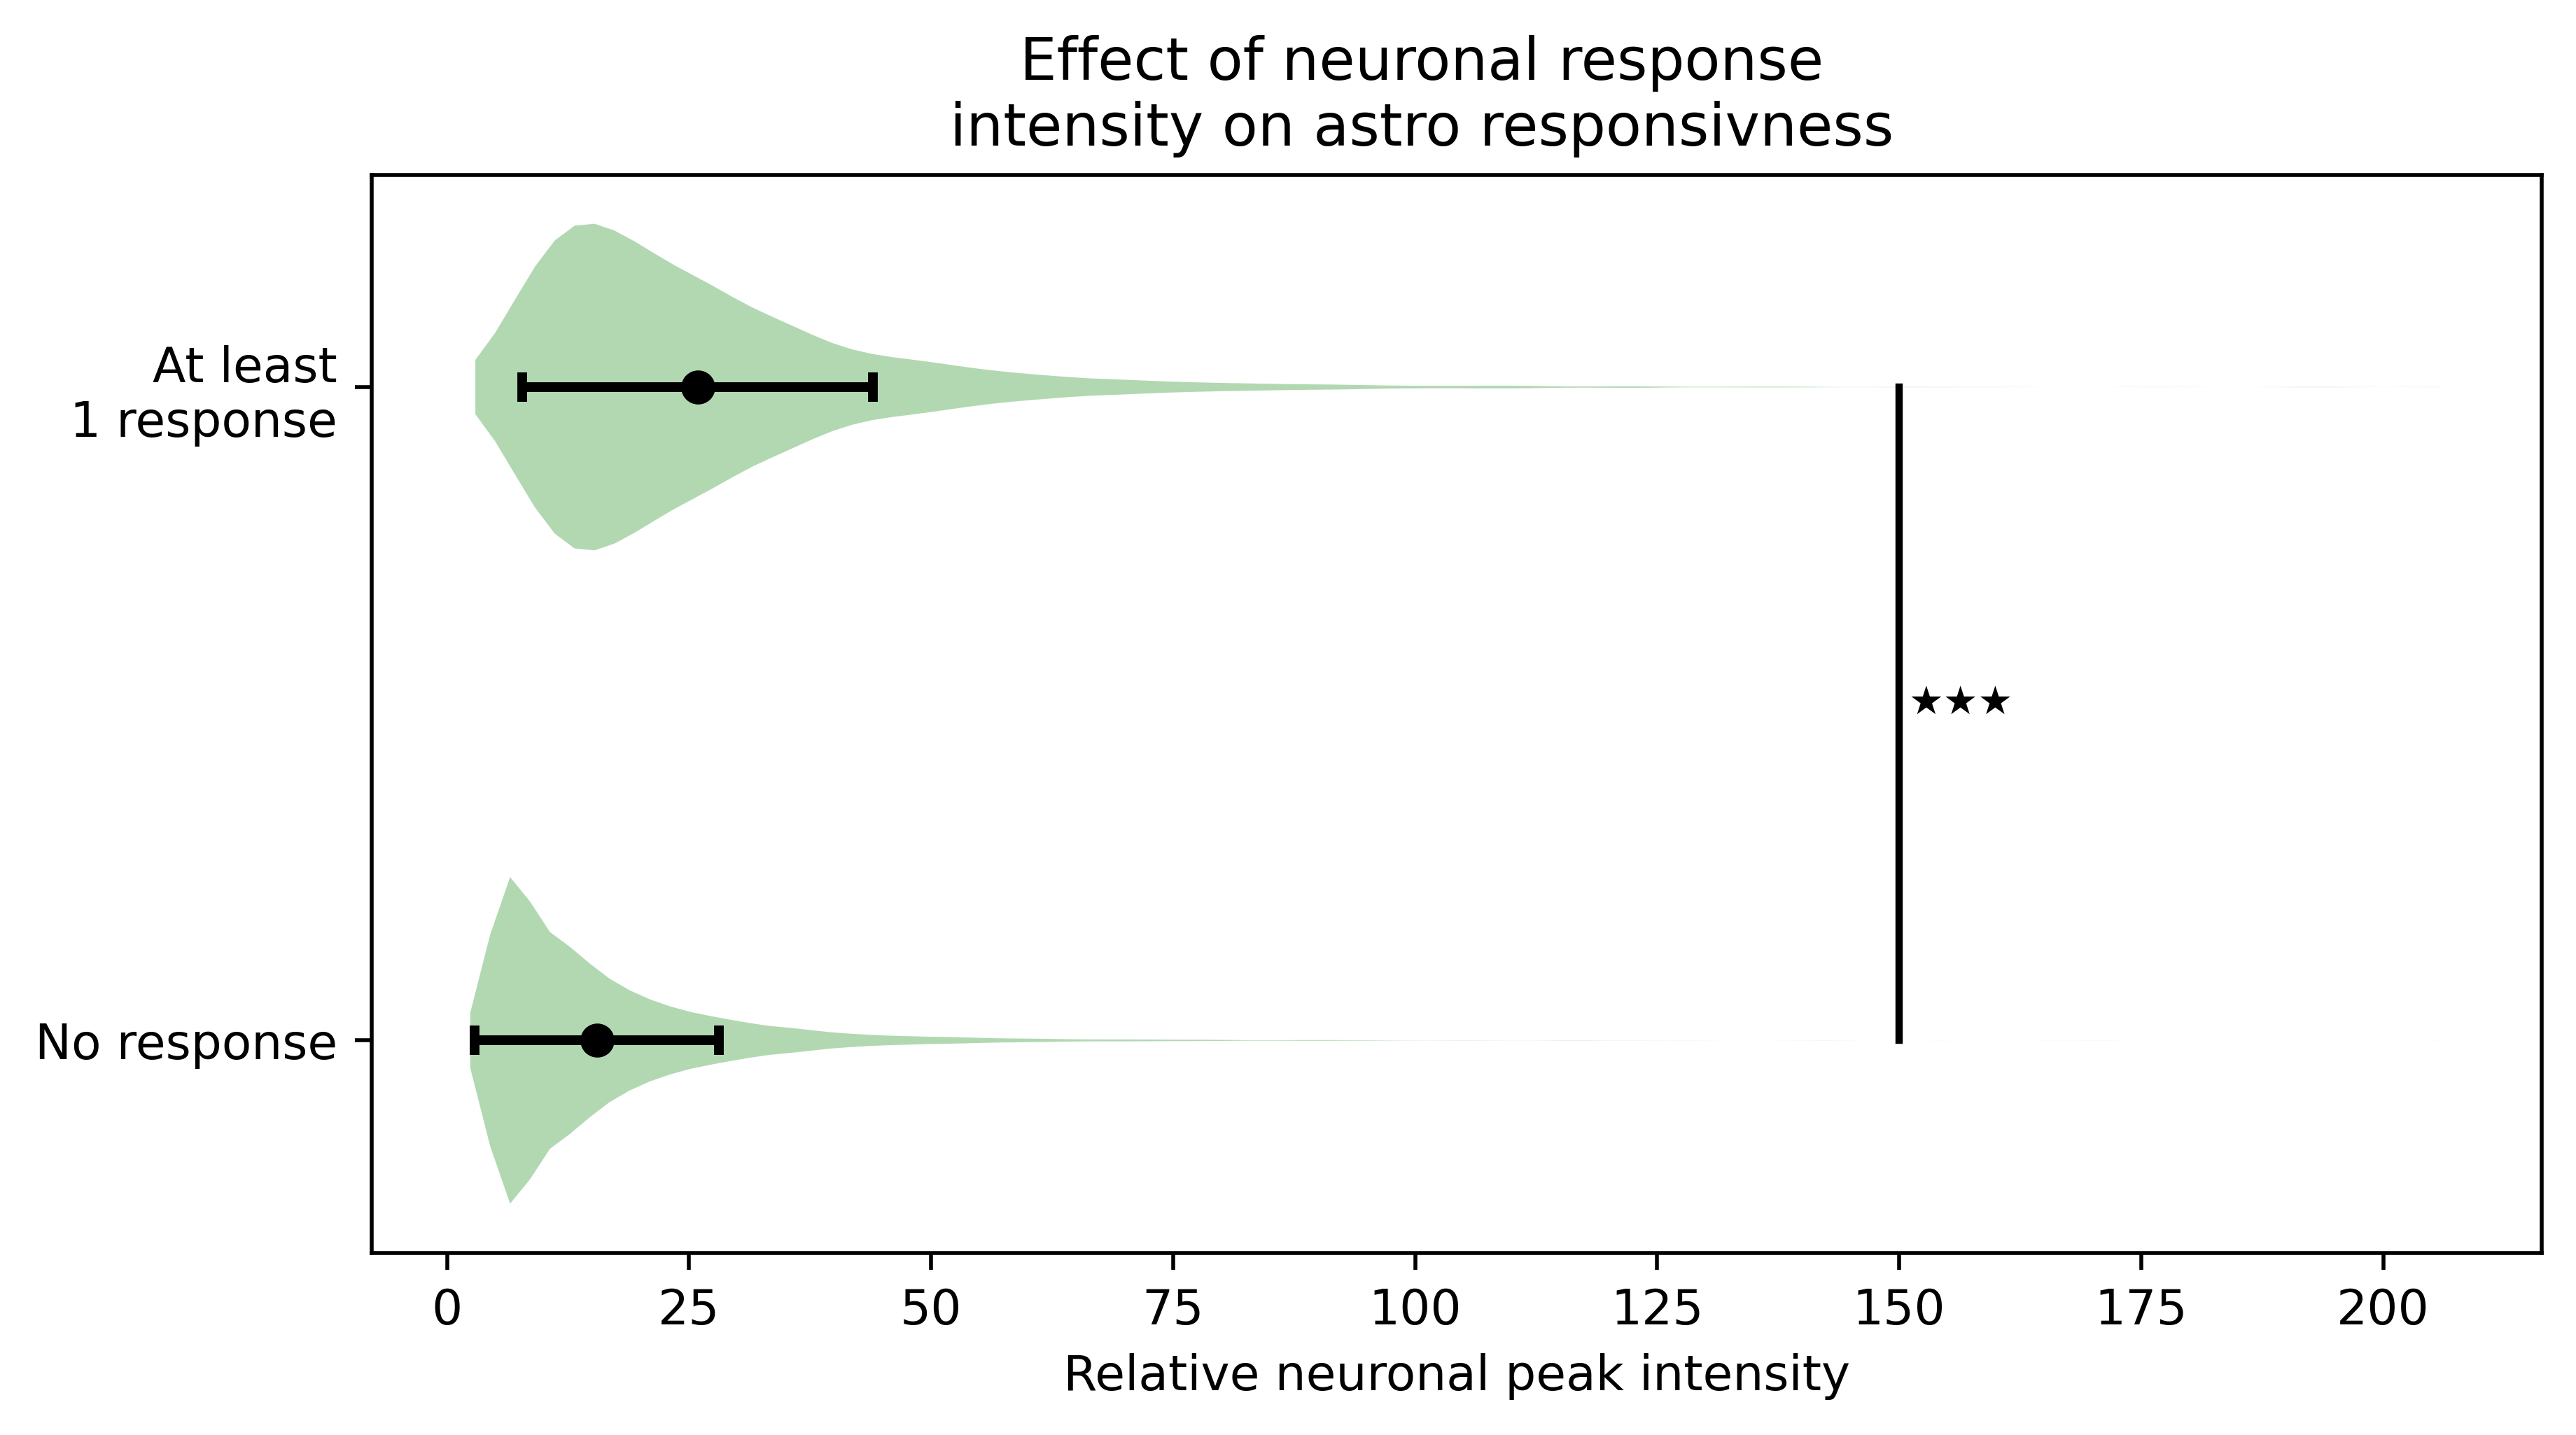

In [21]:
fig, ax = plt.subplots(1, 1, dpi = 500, figsize = (8, 4))
dataset = [astro_responsivness[0, astro_responsivness[1]==0], astro_responsivness[0, astro_responsivness[1]>0]]
violins = ax.violinplot(dataset, vert= False, showextrema=False)
color = 'green'
for body in violins['bodies']:
    body.set_facecolor(color)
pr = lambda set: print(f'{np.mean(set):.3f} \u00B1 {np.std(set):.3f} (N = {len(set)})')
pr(dataset[0])
pr(dataset[1])
ax.errorbar(np.average(dataset[0]), 1, xerr = np.std(dataset[0]), color = 'black', capsize = 3, linewidth = 2, capthick=2, fmt = 'o')
ax.errorbar(np.average(dataset[1]), 2, xerr = np.std(dataset[1]), color = 'black', capsize = 3, linewidth = 2, capthick=2, fmt = 'o')

ax.set_xlabel("Relative neuronal peak intensity")
ax.set_yticks((1, 2))
ax.set_yticklabels(("No response", "At least\n1 response"))
ax.plot([150, 150], [2, 1], color = 'black')
ax.text(151, 1.5, "★★★", fontsize = 8)
fig.suptitle("Effect of neuronal response\nintensity on astro responsivness")
# save_fig(fig, "Effect of neuronal response intensity on astro responsivness (high)")

## E

In [22]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = astro_intensity[0]
y = astro_intensity[1]
i = np.isnan(y)
y = y[~i]
X = X[~i]
# X = X.reshape(-1, 1)
index = np.arange(len(y))
np.random.shuffle(index)
y = y[index]
X = X[index]


reg = LinearRegression().fit(X.reshape(-1, 1), y)


In [24]:
scipy.stats.pearsonr(X, y)

PearsonRResult(statistic=0.04418694565413167, pvalue=0.00011674148428875372)

Text(0, 0.5, 'Astrocytical average peak intensity')

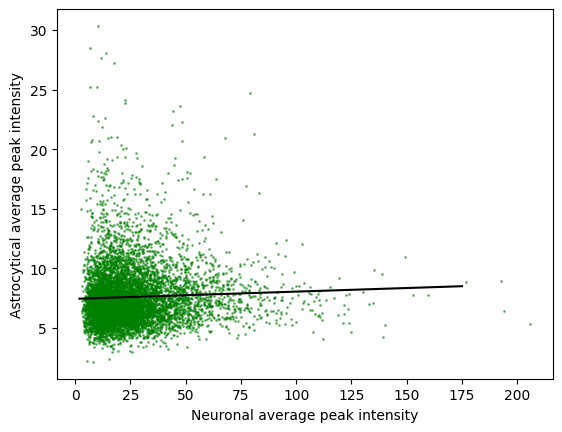

In [26]:
fig, ax = plt.subplots(1, 1)
ax.scatter(
    astro_intensity[0], 
    astro_intensity[1],
    color = 'green',
    alpha = 0.5,
    s = 1)
ax.plot(
    (2, 175), 
    (2*reg.coef_ + reg.intercept_, 175*reg.coef_ + reg.intercept_),
    color = 'black')
# ax.set_ylim(2, 30)
# ax.set_xlim(2, 50)
ax.set_xlabel('Neuronal average peak intensity')
ax.set_ylabel('Astrocytical average peak intensity')

## New loading

In [27]:
astro_responsivness = None
astro_intensity = None

for info in input_output.mouse_infos(currents = 'all'):
    neurons_activity, astrocytes_activity = signal_processing.get_activity(info)
    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(info)
    
    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    astrocytes_peaks[astrocytes_peaks < 2] = np.nan
    neurons_peaks[neurons_activity == 0] = np.nan
    neurons_peaks[neurons_peaks < 2] = np.nan

    astrocytes_activity_sum = np.sum(astrocytes_activity, axis = 0).flatten()
    astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
    neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()
    neurons_activity_sum = np.sum(neurons_activity, axis = 0).flatten()


    new_astropoints = np.vstack((neurons_activity_sum, astrocytes_activity_sum))
    if astro_responsivness is None:
        astro_responsivness = new_astropoints
    else:
        astro_responsivness = np.hstack((astro_responsivness, new_astropoints))
    # astro_responsivness = astro_responsivness[:, ~np.isnan(astro_responsivness[0])]

    new_astropoints = np.vstack((neurons_activity_sum, astrocytes_peaks_avg))
    if astro_intensity is None:
        astro_intensity = new_astropoints
    else:
        astro_intensity = np.hstack((astro_intensity, new_astropoints))
    astro_intensity = astro_intensity[:, ~np.isnan(astro_intensity[1])]

/tmp/ipykernel_144177/3908870978.py:14: RuntimeWarning: Mean of empty slice
  astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0).flatten()
/tmp/ipykernel_144177/3908870978.py:15: RuntimeWarning: Mean of empty slice
  neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0).flatten()


## C

Text(0.5, 0.98, 'Normalized number of responses')

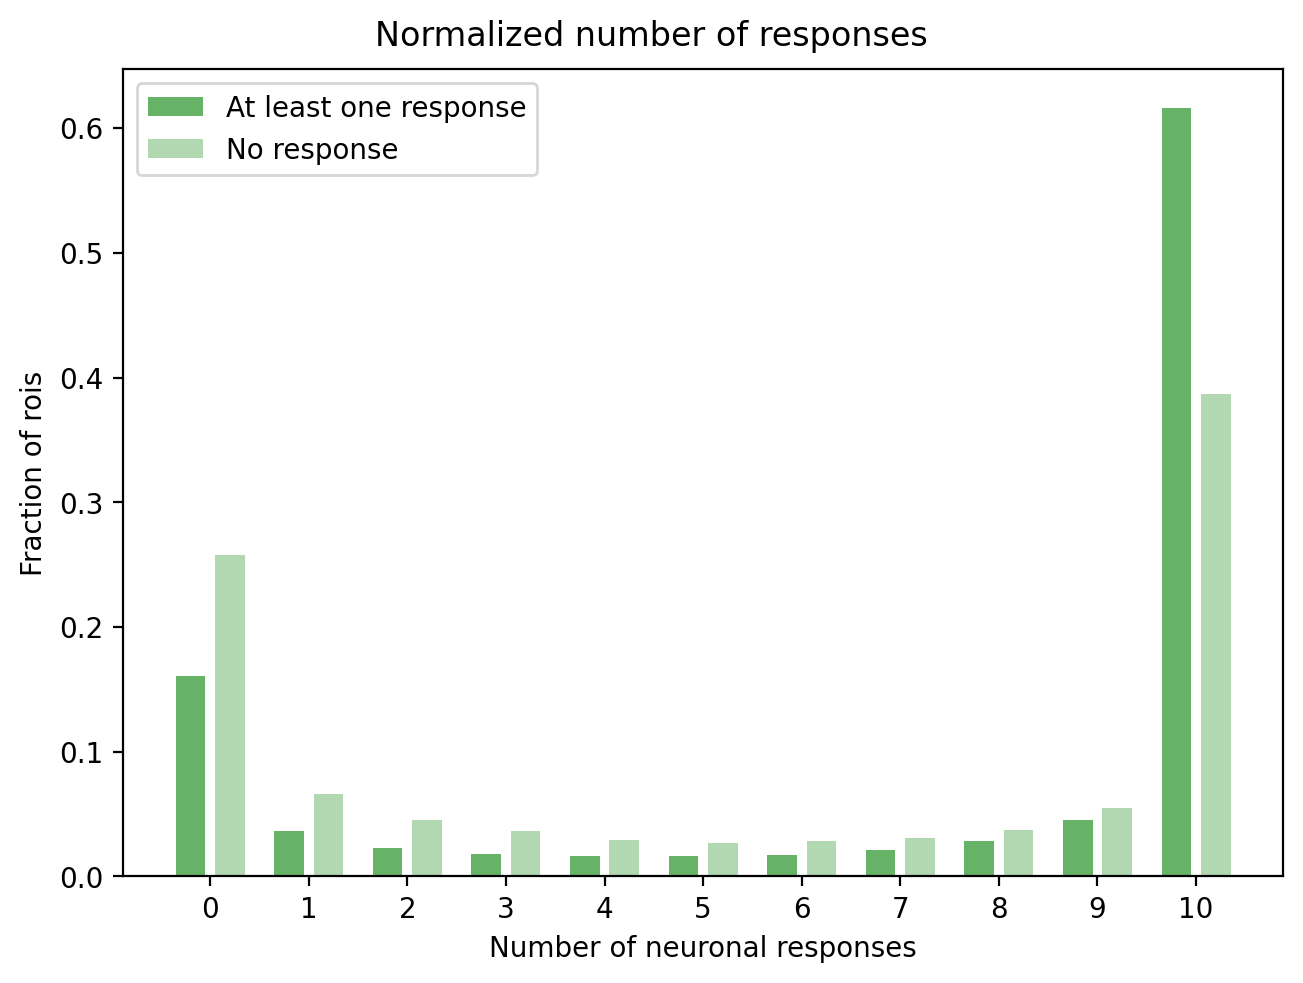

In [28]:
responsive = astro_responsivness[0, astro_responsivness[1]>0]
not_responsive = astro_responsivness[0, astro_responsivness[1]==0]
_, responsive_counts = np.unique(responsive, return_counts=True)
_, not_responsive_counts = np.unique(not_responsive, return_counts=True)

responsive_freq = responsive_counts/np.sum(responsive_counts)
not_responsive_freq = not_responsive_counts/np.sum(not_responsive_counts)

fig, ax = plt.subplots(1, 1, dpi = 200, layout = "compressed")
ax.bar(np.arange(11) - 0.2, responsive_freq, label = 'At least one response', width = 0.3, color = 'green', alpha = 0.6)
ax.bar(np.arange(11) + 0.2, not_responsive_freq, label = 'No response', width = 0.3, color = 'green', alpha = 0.3)
ax.legend()
ax.set_xlabel('Number of neuronal responses')
ax.set_ylabel('Fraction of rois')
ax.set_xticks(np.arange(11))
fig.suptitle("Normalized number of responses")
# save_fig(fig, 'Effect of neuronal responsivness on astro responsivness (high currents)')

In [29]:
scipy.stats.chisquare(responsive_counts, not_responsive_counts*np.sum(responsive_counts)/np.sum(not_responsive_counts))

Power_divergenceResult(statistic=2058.136361284395, pvalue=0.0)

## D

In [30]:
dataset = [astro_intensity[1, astro_intensity[0] == i] for i in range(11)]
scipy.stats.kruskal(*dataset)

KruskalResult(statistic=67.79563216524184, pvalue=1.1791406824008654e-10)

7.115 ± 2.176 (N = 1457)
8.083 ± 3.774 (N = 332)
7.604 ± 2.916 (N = 208)
7.228 ± 1.999 (N = 163)
7.355 ± 1.922 (N = 149)
7.305 ± 2.322 (N = 152)
7.331 ± 2.583 (N = 158)
7.332 ± 2.042 (N = 190)
7.594 ± 2.158 (N = 257)
7.580 ± 2.289 (N = 408)
7.620 ± 2.416 (N = 5581)


Text(5, 25.6, '★')

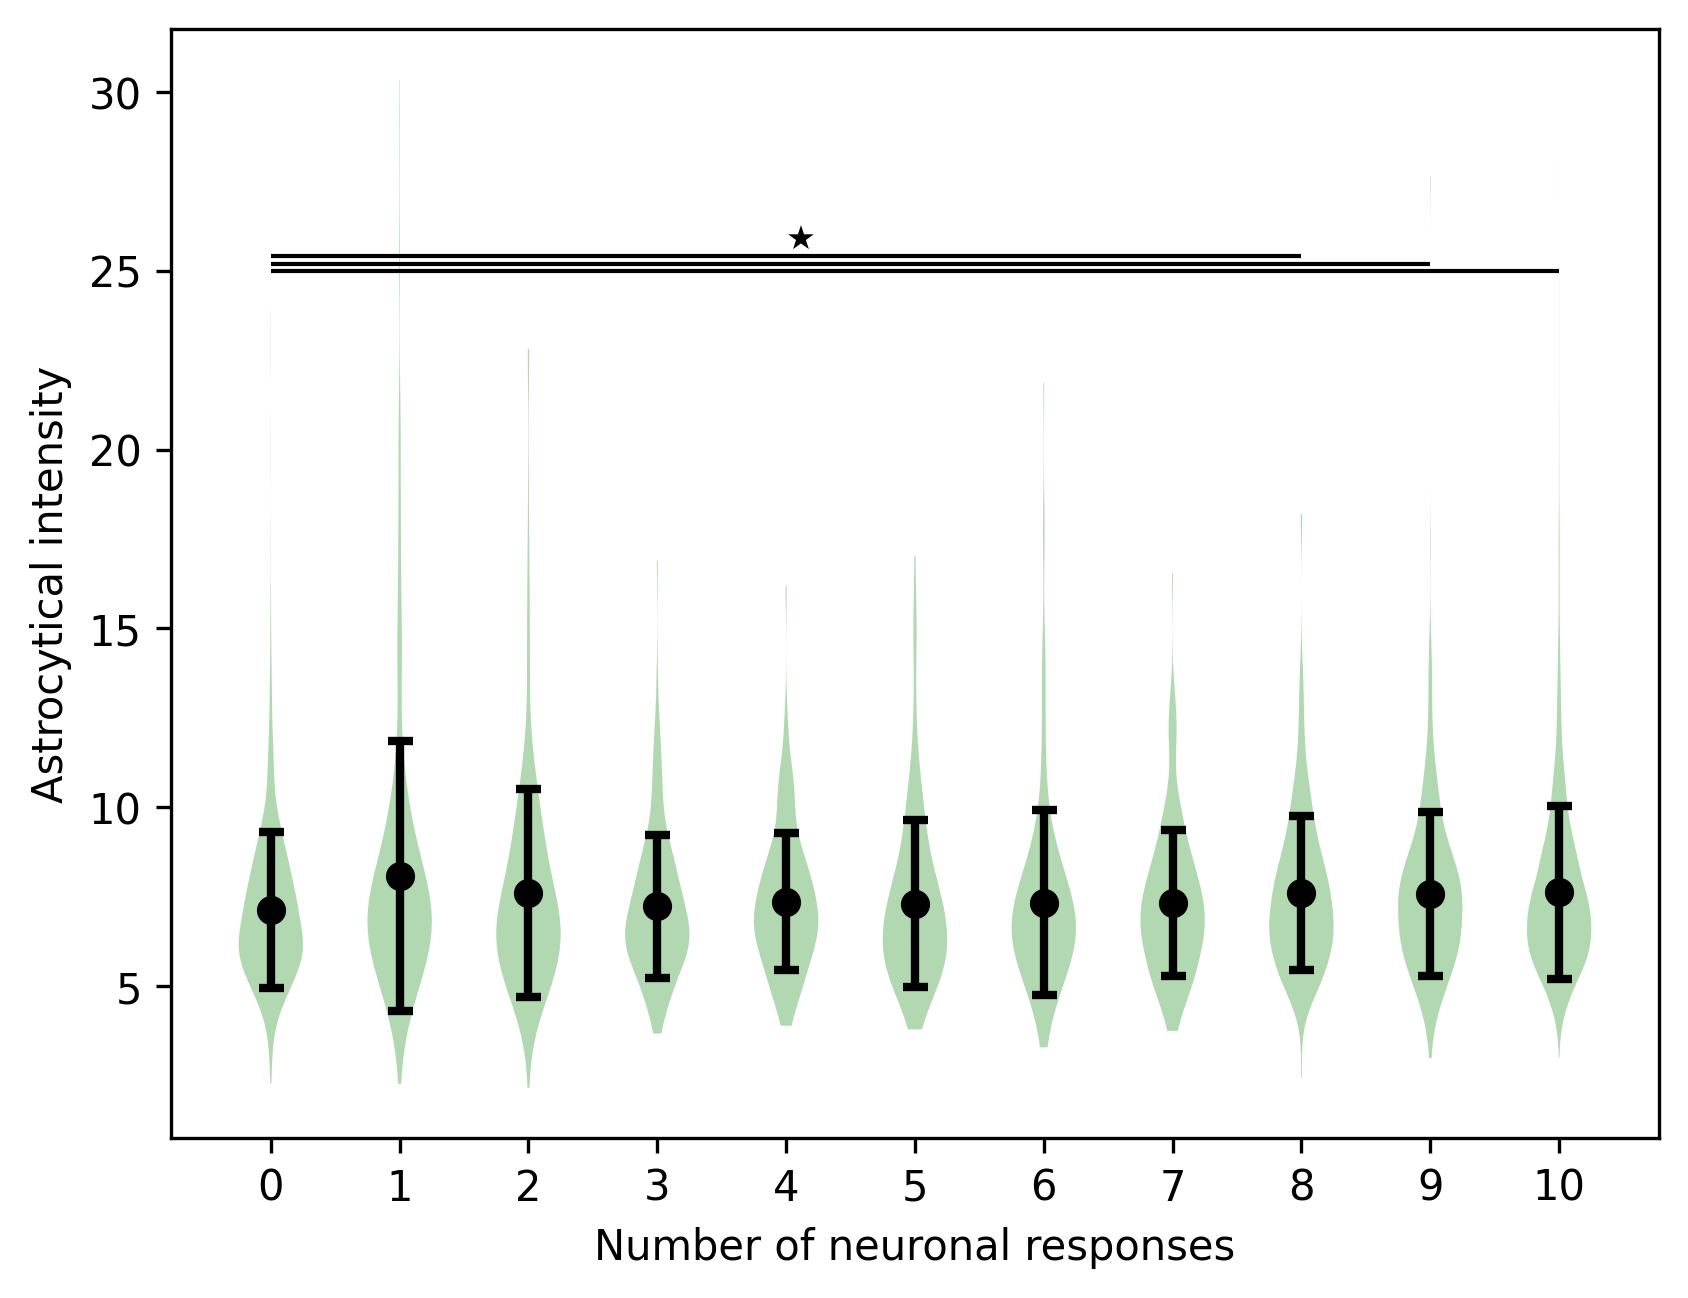

In [31]:
fig , ax = plt.subplots(1, 1, dpi = 300)
violins = ax.violinplot(dataset, showextrema=False)
ax.set_xticks(np.arange(11)+1, labels = np.arange(11))
ax.set_xlabel('Number of neuronal responses')
ax.set_ylabel('Astrocytical intensity')
color = 'green'
for body in violins['bodies']:
    body.set_facecolor(color)
pr = lambda set: print(f'{np.mean(set):.3f} \u00B1 {np.std(set):.3f} (N = {len(set)})')
for index, data in enumerate(dataset):
    
    pr(data)
    ax.errorbar(index+1,
                np.mean(data),
                yerr = np.std(data),
                fmt = 'o',
                capsize = 3,
                capthick = 2,
                linewidth = 2,
                color = 'black')
transform = mtl.transforms.blended_transform_factory(ax.transData, ax.transData)
enchors = [(1, 25), (1, 25.2), (1, 25.4)]
widths = [10, 9, 8]
for anchor, width in zip(enchors, widths):
    rect = ptch.Rectangle(anchor, width=width, height=0.001, color="black", transform=transform)
    ax.add_patch(rect)
ax.text(5, 25.6, "★", fontsize = 8, transform = transform,)

# save_fig(fig, 'Effect of responsivness on peak intensity (all currents)')


In [33]:
scipy.stats.pearsonr(astro_intensity[1], astro_intensity[0])

PearsonRResult(statistic=0.056883687394439025, pvalue=6.075556956563557e-08)

## F

In [34]:
info = input_output.load(input_output.EXAMPLE_FILE)
# info = nasa.input_output.load('/home/s233039/Desktop/KU/data/79/microelectrode_experiments/2_10uA 10 trials.tiff')
image = np.average(info['neurons'], axis = 0)
enhanced_image = image_processing.enhance_contrast(image)
image = image_processing.get_image(enhanced_image, 'neurons', enhanced=True)
segmentation = image_processing.segment_neurons(enhanced_image)
overlap = image_processing.rois_from_segmentation(segmentation)

/home/s233039/Desktop/KU/code/.venv/lib/python3.11/site-packages/qim3d/segmentation/_common_segmentation_methods.py:51: RuntimeWarning: When min_distance < 1, peak_local_max acts as finding image > max(threshold_abs, threshold_rel * max(image)).
  coords = skimage.feature.peak_local_max(
Total number of objects found: 158


In [35]:
def add_scale(ax, res_x):
    origin = (0.05, 0.08)
    thickness = 0.005
    pixels = int(50/res_x)

    length = pixels/(32*8)

    rect = ptch.Rectangle(origin, width=length, height=thickness, color="white", transform=ax.transAxes)
    ax.add_patch(rect)

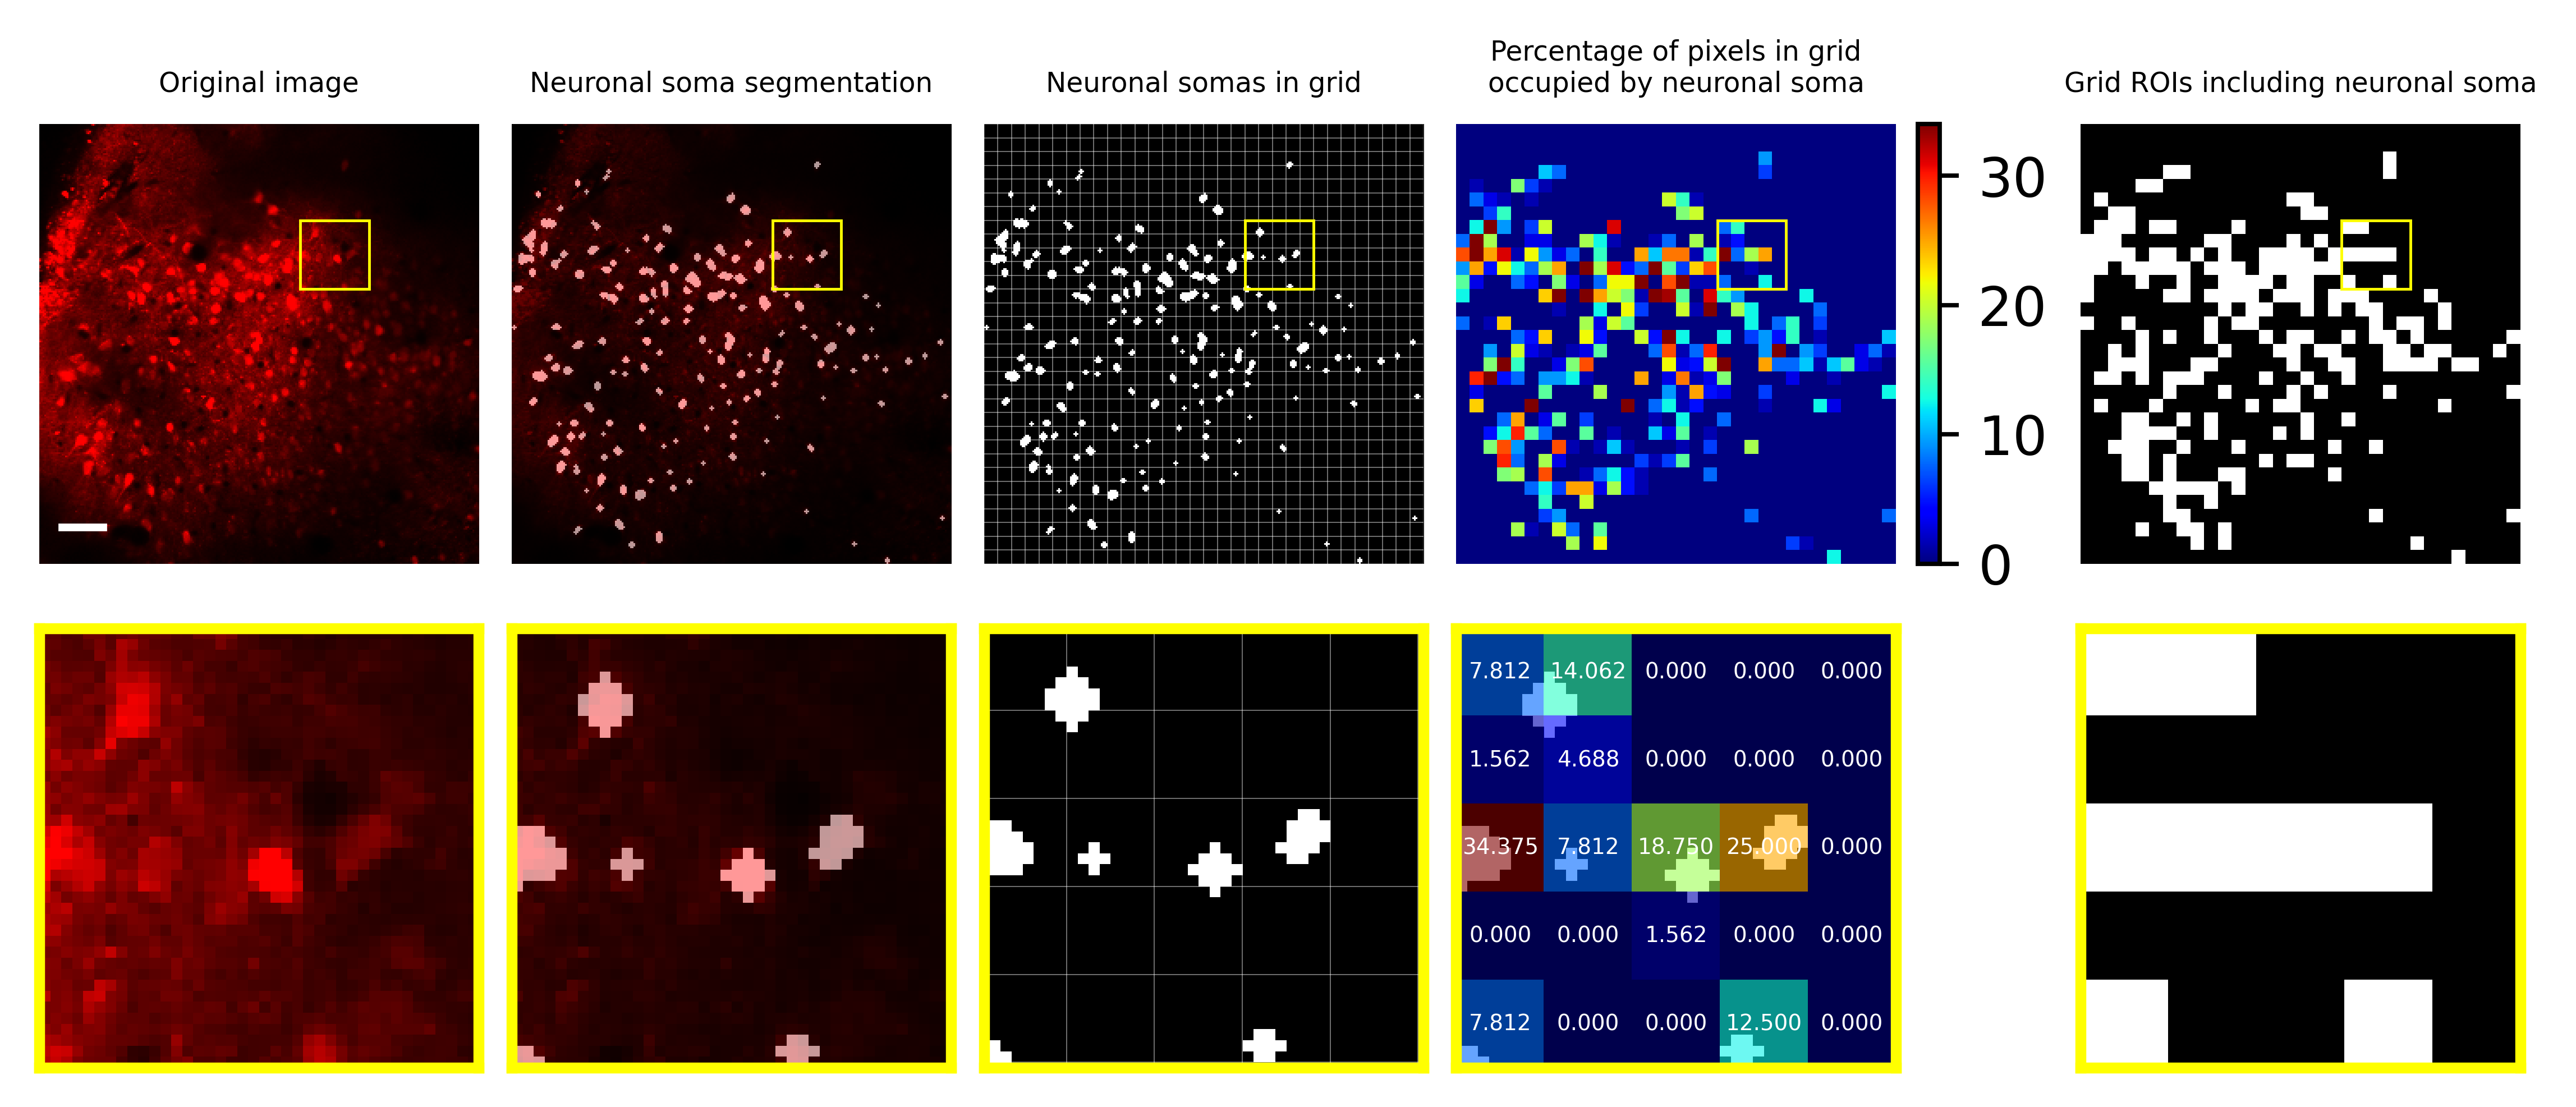

In [36]:
fig, ax = plt.subplots(2, 5, dpi = 700, layout = "compressed")
rects = 5
grid_size = consts.DEFAULT_GRID_SIZE

a = ax[0,0]
a.imshow(image)
add_scale(a, info['x'])
neurons_zoom = image[7*grid_size:12*grid_size, 19*grid_size:24*grid_size]
a = ax[1, 0]
a.imshow(neurons_zoom)

a = ax[0, 1]
a.imshow(image)
a.imshow(segmentation, cmap = 'gray', alpha = 0.6)
a = ax[1, 1]
a.imshow(neurons_zoom)
a.imshow(segmentation[7*grid_size:12*grid_size, 19*grid_size:24*grid_size], cmap = 'gray', alpha = 0.6)

def p2(a):
    a.imshow(segmentation, cmap = 'grey')
    grid_size = consts.DEFAULT_GRID_SIZE
    color = "white"
    linewidth = 0.05
    for i, j in plotting.rois_indices(image.shape, grid_size):
        rect = ptch.Rectangle((j*grid_size-0.5, i*grid_size-0.5), grid_size, grid_size, edgecolor = color, facecolor = 'none', linewidth = linewidth)
        a.add_patch(rect)
p2(ax[0, 2])
p2(ax[1, 2])
ax[1, 2].set_xlim(19*grid_size, 24*grid_size)
ax[1, 2].set_ylim(12*grid_size, 7*grid_size)


a = ax[0, 3]
im = a.imshow(overlap, cmap = 'jet', vmax =34)
fig.colorbar(im)
a = ax[1, 3]
part = overlap[7:12, 19:24]
im = a.imshow(part, cmap = "jet")
for i in range(5):
    for j in range(5):
        a.text(j, i, f'{overlap[7+i, 19+j]:.3f}', ha = 'center', va = 'center', color = "white", fontsize = 4)
part = segmentation[7*grid_size:12*grid_size, 19*grid_size:24*grid_size]
a.imshow(part, extent=im.get_extent(), alpha = 0.4, cmap = 'gray')

a = ax[0, 4]
a.imshow(overlap > 5, cmap = 'grey')
a = ax[1, 4]
a.imshow(overlap > 5, cmap = 'grey')
a.set_xlim(18.5, 23.5)
a.set_ylim(11.5, 6.5)

titles = [
    'Original image',
    'Neuronal soma segmentation',
    'Neuronal somas in grid',
    'Percentage of pixels in grid\noccupied by neuronal soma',
    'Grid ROIs including neuronal soma'
]
for index, a in enumerate(ax[0]):
    if index > 2:
        grid_size = 1
    rect = ptch.Rectangle(((21-rects//2)*grid_size - 0.5, (9-rects//2)*grid_size - 0.5), rects*grid_size, rects*grid_size, edgecolor = 'yellow', facecolor = 'none', linewidth = 0.5)
    a.add_patch(rect)
    a.set_axis_off()
    a.set_title(titles[index], fontsize = 5)

for a in ax[1]:
    a.set_xticks([])
    a.set_yticks([])
    for spine in a.spines.values():
        spine.set_color('yellow')    # Change color to yellow
        spine.set_linewidth(2)



## Segmentation

In [38]:
nep, asp = np.array([]).reshape((2, 0)), np.array([]).reshape((2, 0))
ner, asr = np.array([]).reshape((2, 0)), np.array([]).reshape((2, 0))
for mouse_info in input_output.mouse_infos(currents = 'all'):
    segmentation = image_processing.segment_neurons(mouse_info['neurons'])
    overlap = image_processing.rois_from_segmentation(segmentation)
    neurons_peaks, astrocytes_peaks = signal_processing.get_peaks(mouse_info)
    neurons_activity, astrocytes_activity = signal_processing.get_activity(mouse_info)

    overlap_threshold = 5
    is_overlaping = overlap > overlap_threshold

    neurons_activity_sum = np.sum(neurons_activity, axis = 0)
    astrocytes_activity_sum = np.sum(astrocytes_activity, axis = 0)
    n_res_points = np.vstack((neurons_activity_sum.flatten(), is_overlaping.flatten()))
    a_res_points = np.vstack((astrocytes_activity_sum.flatten(), is_overlaping.flatten()))
    ner = np.hstack((ner, n_res_points))
    asr = np.hstack((asr, a_res_points))

    neurons_peaks[neurons_activity == 0] = np.nan
    astrocytes_peaks[astrocytes_activity == 0] = np.nan
    neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0)
    astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0)
    n_peak_points = np.vstack((neurons_peaks_avg.flatten(), is_overlaping.flatten()))
    a_peak_points = np.vstack((astrocytes_peaks_avg.flatten(), is_overlaping.flatten()))
    nep = np.hstack((nep, n_peak_points))
    asp = np.hstack((asp, a_peak_points))

Total number of objects found: 191
/tmp/ipykernel_144177/684281203.py:21: RuntimeWarning: Mean of empty slice
  neurons_peaks_avg = np.nanmean(neurons_peaks, axis = 0)
/tmp/ipykernel_144177/684281203.py:22: RuntimeWarning: Mean of empty slice
  astrocytes_peaks_avg = np.nanmean(astrocytes_peaks, axis = 0)
Total number of objects found: 142
Total number of objects found: 135
Total number of objects found: 82
Total number of objects found: 207
Total number of objects found: 190
Total number of objects found: 138
Total number of objects found: 179
Total number of objects found: 183
Total number of objects found: 206
Total number of objects found: 206
Total number of objects found: 218
Total number of objects found: 137
Total number of objects found: 158
Total number of objects found: 120
Total number of objects found: 122
Total number of objects found: 116
Total number of objects found: 89
Total number of objects found: 108
Total number of objects found: 124
Total number of objects found:

## G, H

Text(0.5, 0.98, 'Normalized number of responses')

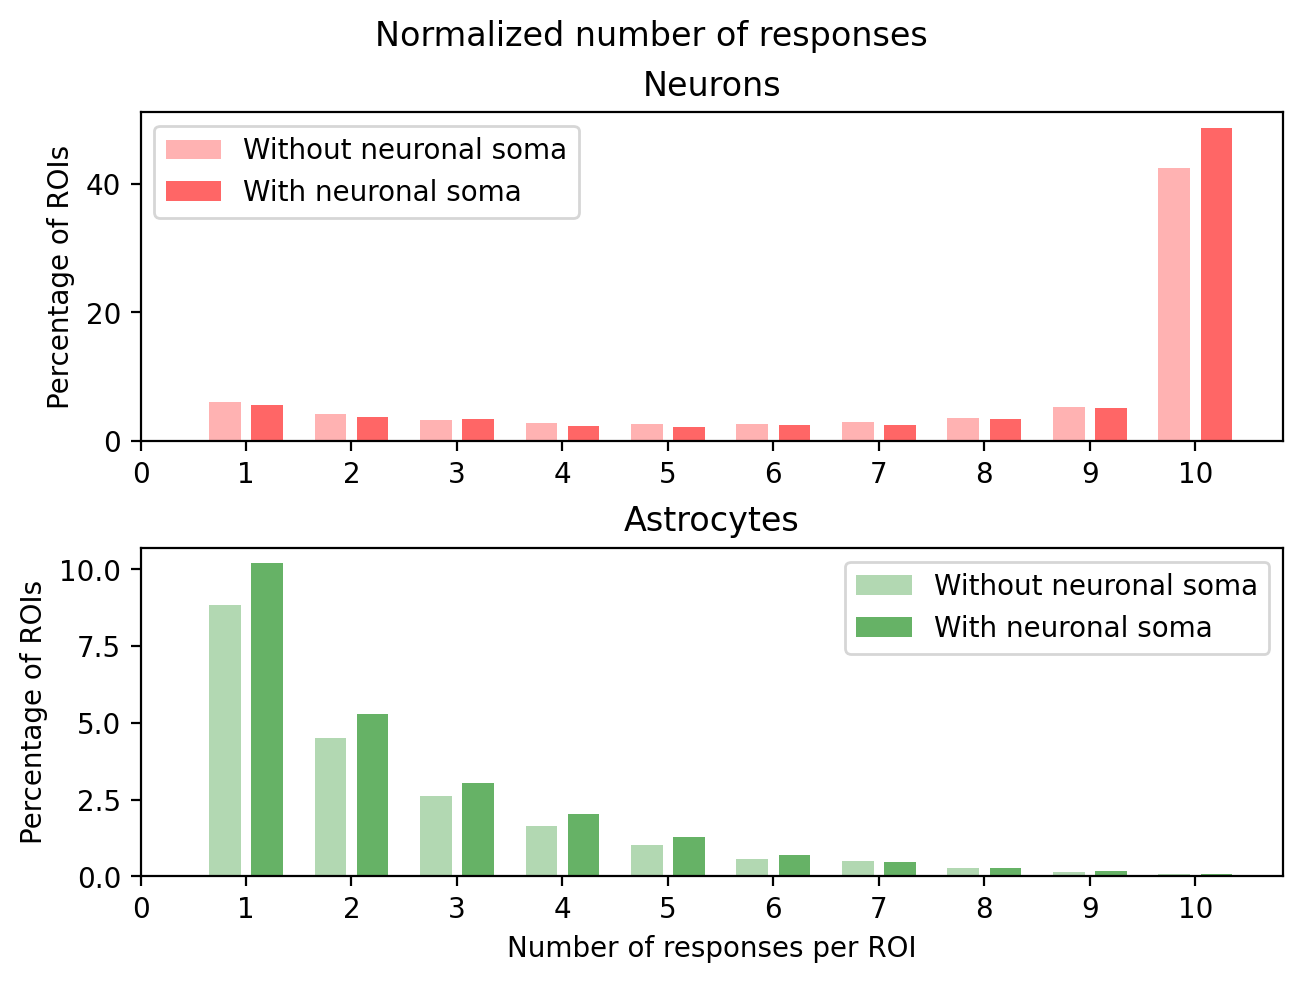

In [39]:
fig, ax = plt.subplots(2, 1, dpi = 200, layout = "compressed")
for index, data in enumerate((ner, asr)):
    d = data[0, data[1] == 0]
    u, c_not = np.unique(d, return_counts=True)
    c = 100*c_not/np.sum(c_not)
    offset = 0.2
    ax[index].bar(u[1:] - offset, c[1:], label = 'Without neuronal soma', width= 0.3, color = 'green' if index else 'red', alpha = 0.3)
    d = data[0, data[1] == 1]
    u, c_yes = np.unique(d, return_counts=True)
    c = 100*c_yes/np.sum(c_yes)
    ax[index].bar(u[1:] + offset, c[1:], label = 'With neuronal soma', width= 0.3, color = 'green' if index else 'red', alpha = 0.6)

    ax[index].legend()
    ax[index].set_ylabel("Percentage of ROIs")
    ax[index].set_xticks(np.arange(11))
    # print(scipy.stats.chisquare(c_not, np.sum(c_not)*c_yes/np.sum(c_yes)))
ax[0].set_title("Neurons")
ax[1].set_title("Astrocytes")
ax[1].set_xlabel("Number of responses per ROI")
fig.suptitle("Normalized number of responses")
# save_fig(fig, "Effect of overlap on responsivness (high currents)")

##  I, J

Neurons
MannwhitneyuResult(statistic=64581615.0, pvalue=2.8693315803726723e-21)
Astrocytes
MannwhitneyuResult(statistic=6078324.0, pvalue=6.03909948173674e-08)


Text(0, 0.5, 'Average peak intensity')

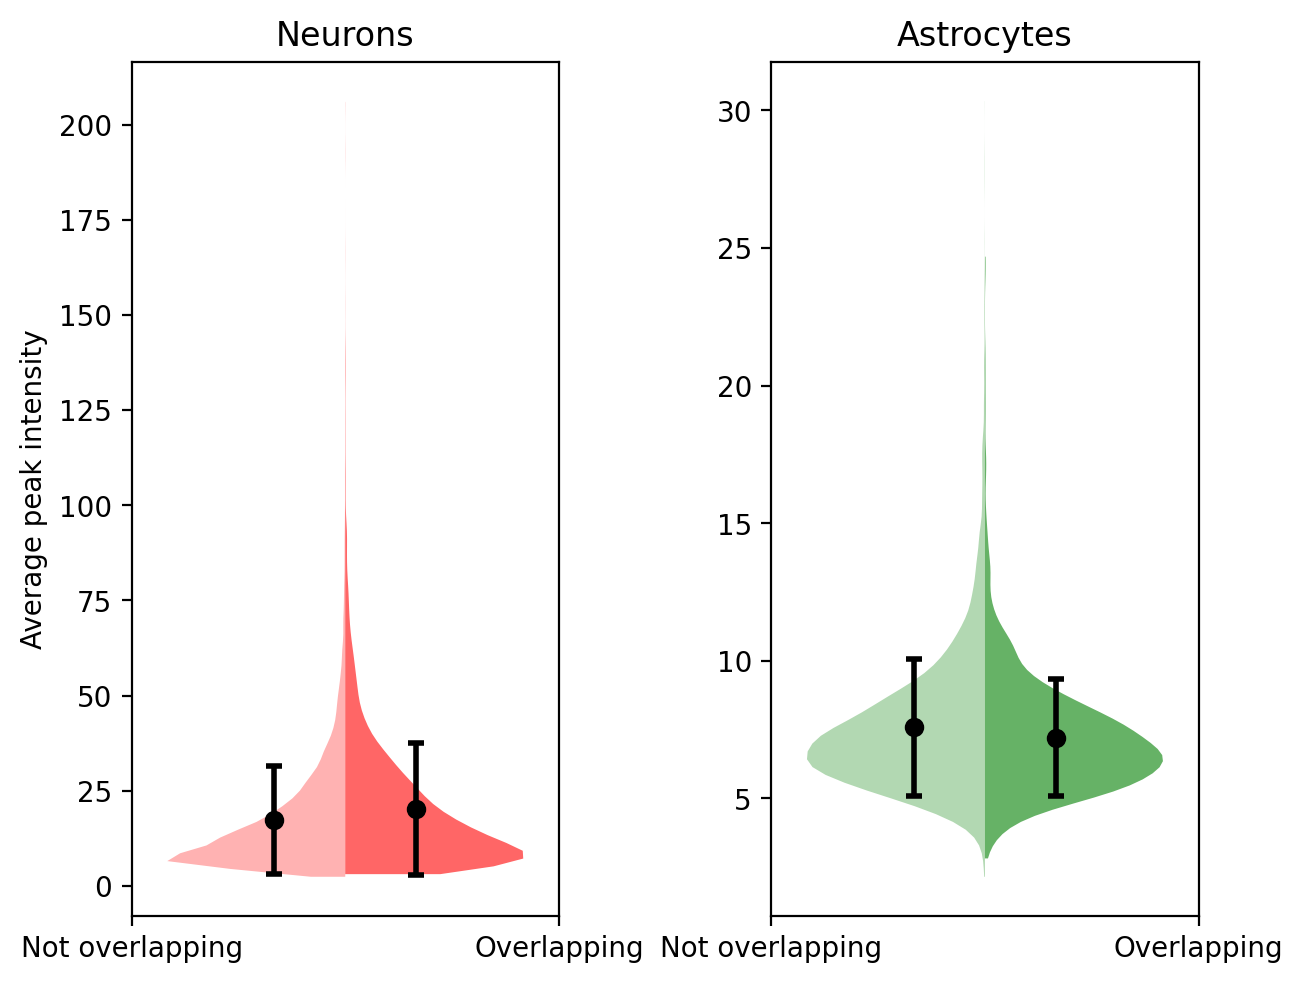

In [41]:
from typing import Iterable
def set_color(violin, color, alpha = None):
    if isinstance(violin['bodies'], Iterable):
        for body in violin['bodies']:
            body.set_facecolor(color)
            if alpha is not None:
                body.set_alpha(alpha)



fig, ax = plt.subplots(1, 2, dpi = 200, layout = 'compressed')
for index, data in enumerate((nep, asp)):
    dataset = [data[0, data[1] == i] for i in range(2)]
    dataset = [r[r>0] for r in dataset]
    color = 'green' if index else 'red'
    print('Neurons' if index == 0 else 'Astrocytes')
    print(scipy.stats.mannwhitneyu(dataset[0], dataset[1]))
    violin = ax[index].violinplot(dataset[0], side = 'low', showextrema = False)
    set_color(violin, color, alpha = 0.3)
    errbar = lambda x, data: ax[index].errorbar(
                                            x,
                                            np.average(data),
                                            yerr = np.std(data),
                                            color = 'black',
                                            fmt = 'o',
                                            capsize =3,
                                            capthick = 2,
                                            linewidth = 2
                                        )
    errbar(0.9, dataset[0])
    violin = ax[index].violinplot(dataset[1], side = 'high', showextrema = False)
    errbar(1.1, dataset[1])
    set_color(violin, color, alpha = 0.6)
    ax[index].set_xticks([0.7, 1.3])
    ax[index].set_xticklabels(['Not overlapping', 'Overlapping'])

ax[0].set_title('Neurons')
ax[1].set_title('Astrocytes')
ax[0].set_ylabel('Average peak intensity')